# Downloading Dataset

In [1]:
#Downloading dataset from kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:21<00:00, 149MB/s]
100% 1.98G/1.98G [00:21<00:00, 99.2MB/s]


In [3]:
#Unzipping dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import tensorflow_datasets as tfds

# Defining Training

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
  directory='/content/train',
    validation_split=0.2,
    subset= 'training',
    seed = 123,
    batch_size=32,
    image_size=(256,256),
)

Found 3115 files belonging to 36 classes.
Using 2492 files for training.


# Validating Data

In [9]:
val_ds=keras.utils.image_dataset_from_directory(
  directory='/content/test',
  labels='inferred',
  label_mode='int',
  seed=123,
  batch_size=32,
  image_size=(256,256)
)

Found 359 files belonging to 36 classes.


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

In [15]:
# Storing class names before applying transformations
original_train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    validation_split=0.2,
    subset='training',
    seed=123,
    batch_size=32,
    image_size=(256, 256),
)
class_names = original_train_ds.class_names

# Applying transformations for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = original_train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

print(class_names)

Found 3115 files belonging to 36 classes.
Using 2492 files for training.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [16]:
#plotting images of fruits and vegetables

# Plotting images

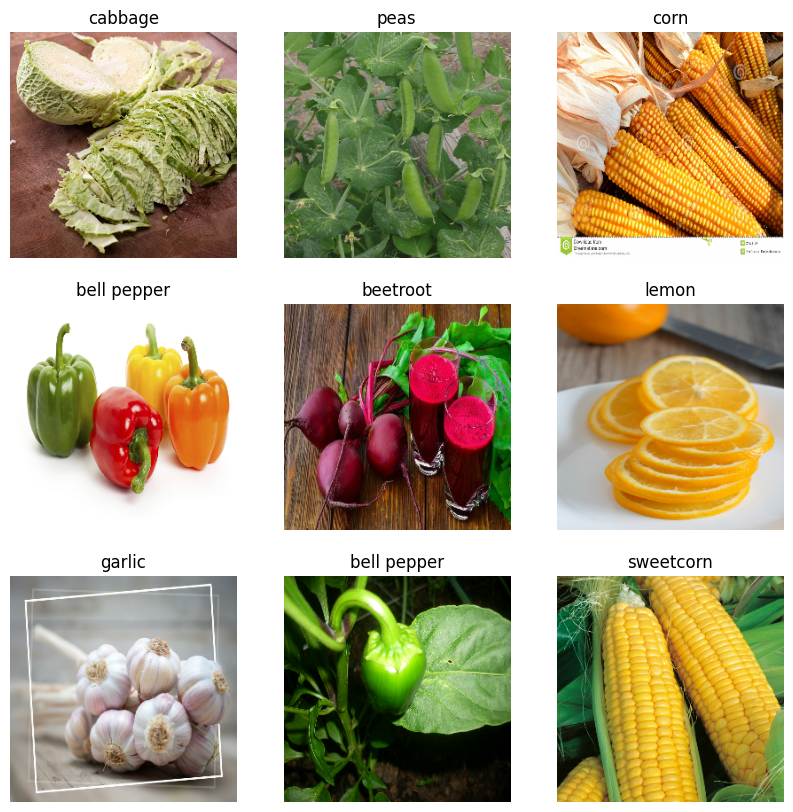

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

# Using optimzer as adam

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

# Choosing epohcs of 15

In [23]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
78/78 [==============================] - 303s 3s/step - loss: 3.3558 - accuracy: 0.0799 - val_loss: 2.8959 - val_accuracy: 0.1532
Epoch 2/15
78/78 [==============================] - 237s 3s/step - loss: 2.8164 - accuracy: 0.1878 - val_loss: 2.3373 - val_accuracy: 0.2228
Epoch 3/15
78/78 [==============================] - 238s 3s/step - loss: 2.4910 - accuracy: 0.2448 - val_loss: 2.1170 - val_accuracy: 0.3203
Epoch 4/15
78/78 [==============================] - 234s 3s/step - loss: 2.3390 - accuracy: 0.2821 - val_loss: 1.9839 - val_accuracy: 0.4039
Epoch 5/15
78/78 [==============================] - 239s 3s/step - loss: 2.2309 - accuracy: 0.3158 - val_loss: 1.8709 - val_accuracy: 0.4150
Epoch 6/15
78/78 [==============================] - 241s 3s/step - loss: 2.1343 - accuracy: 0.3274 - val_loss: 1.7404 - val_accuracy: 0.4596
Epoch 7/15
78/78 [==============================] - 245s 3s/step - loss: 2.0341 - accuracy: 0.3672 - val_loss: 1.7975 - val_accuracy: 0.3844
Epoch 8/15
78

In [24]:
test_url ="/content/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_url,
    seed = 123,
    image_size=(256,256),
    shuffle=False
)

Found 359 files belonging to 36 classes.


In [25]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

12/12 [==============================] - 21s 2s/step


In [32]:
results = model.evaluate(test_ds)
print("Test loss, test accuraacy:", results)

12/12 [==============================] - 20s 2s/step - loss: 1.1857 - accuracy: 0.5989
Test loss, test accuraacy: [1.185685634613037, 0.5988857746124268]


In [27]:
y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

        apple       0.75      0.30      0.43        10
       banana       0.80      0.44      0.57         9
     beetroot       0.67      1.00      0.80        10
  bell pepper       0.43      0.90      0.58        10
      cabbage       1.00      0.70      0.82        10
     capsicum       0.58      0.70      0.64        10
       carrot       0.67      0.60      0.63        10
  cauliflower       0.80      0.80      0.80        10
chilli pepper       0.50      0.20      0.29        10
         corn       0.20      0.10      0.13        10
     cucumber       0.33      0.50      0.40        10
     eggplant       0.83      0.50      0.62        10
       garlic       0.67      1.00      0.80        10
       ginger       0.40      0.20      0.27        10
       grapes       0.60      0.60      0.60        10
     jalepeno       0.43      0.30      0.35        10
         kiwi       0.50      0.80      0.62        10
        l

In [29]:
#Importing libraries
import cv2
import matplotlib.pyplot as plt

In [30]:
image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 1s 843ms/step


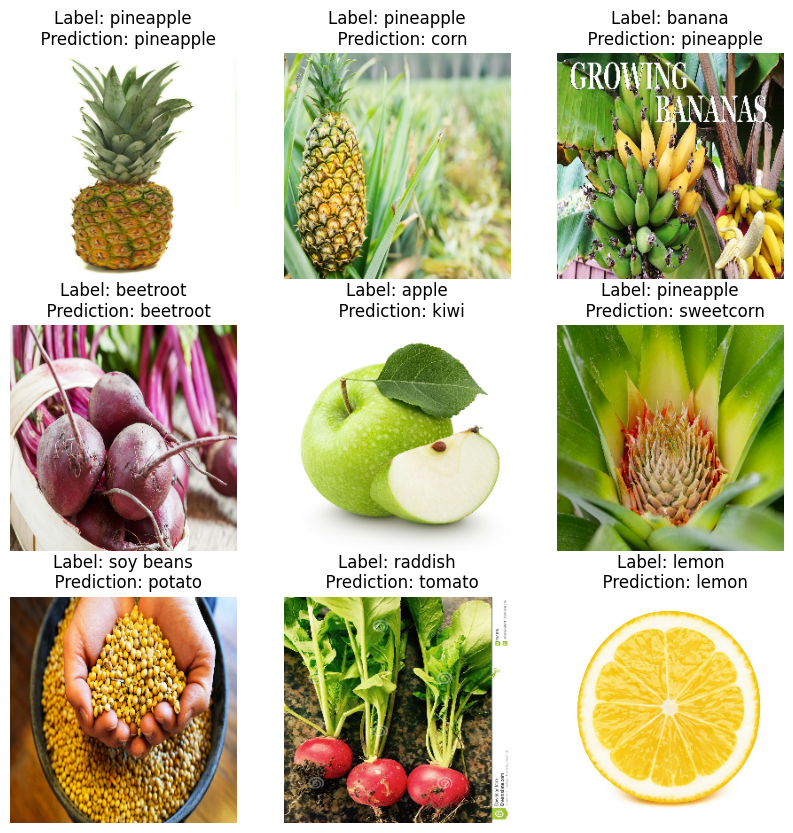

In [33]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Prediction: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")